In [1]:
import torch
import torch.nn as nn
import torch.functional as F
import math
import pandas as pd
import os
import  torch.optim as optim

d_model = 32#QKV空间维度
n_head = 8#头个数   

#配置文档
device = 'cuda' if torch.cuda.is_available() else 'cpu'
config = {
    'seed': 2332030,      # Your seed number, you can pick your lucky number. :)
    'select_all': False,   # Whether to use all features.
    'valid_ratio': 0.2,   # validation_size = train_size * valid_ratio
    'n_epochs': 20000,     # Number of epochs.            
    'batch_size': 256, 
    'learning_rate': 1e-3,              
    'early_stop': 600,    # If model has not improved for this many consecutive epochs, stop training.     
    'save_path': './models/model.ckpt'  # Your model will be saved here.
}



class multi_head_attention(nn.Module):

    def __init__(self,d_model,n_head):
        super(multi_head_attention,self).__init__()

        self.n_head = n_head
        self.d_model = d_model
        self.w_q = nn.Linear(d_model,d_model)
        self.w_k = nn.Linear(d_model,d_model)
        self.w_v = nn.Linear(d_model,d_model)
        self.w_combine = nn.Linear(d_model,d_model)
        self.softmax = nn.Softmax(dim=-1)

    def forward(self,q,k,v):
        batch,time,dimension = q.shape
        n_d = self.d_model //self.n_head
        q, k, v = self.w_q(q),self.w_k(k),self.w_v(v)
        q = q.view(batch,time,self.n_head,n_d).permute(0,2,1,3)#更换维度顺序 0，1，2，3 -> 0,2,1,3
        k = k.view(batch,time,self.n_head,n_d).permute(0,2,1,3)
        v = v.view(batch,time,self.n_head,n_d).permute(0,2,1,3)
        score = q @ k.transpose(2,3)/math.sqrt(n_d)
        mask = torch.tril(torch.ones(time,time,dtype=bool))
        score = score.masked_fill(mask == 0, float("-inf"))
        score = self.softmax(score) @ v
        score = score.permute(0,2,1,3).contiguous().view(batch, time, dimension)
        output = self.w_combine(score)
        return output

def trainer(train_loader,valid_loader,model,config,device):
    if not os.path.isdir('./models'):
        os.mkdir('./models') # Create directory of saving models.
    optimizer = optim.SGD(net.parameters(),config['learning_rate'])






a=torch.Tensor(pd.read_excel("/mnt/home/jiangfengrui/Code/MLP/data1.xlsx").values)
a=(a-torch.mean(a))/torch.std(a)
b= a[0:1000,:]
b= b.view(4,250,32) #reshape
net = multi_head_attention(d_model,n_head)
output = net(b,b,b)
print(output, output.shape)

tensor([[[ 0.0265,  0.0579, -0.6505,  ...,  0.0020, -0.1250,  0.5405],
         [ 0.0265,  0.0579, -0.6505,  ...,  0.0020, -0.1250,  0.5405],
         [ 0.0265,  0.0579, -0.6505,  ...,  0.0020, -0.1250,  0.5405],
         ...,
         [ 0.0425,  0.0844, -0.7362,  ...,  0.0460, -0.1888,  0.5902],
         [ 0.0425,  0.0844, -0.7362,  ...,  0.0460, -0.1888,  0.5902],
         [ 0.0424,  0.0844, -0.7362,  ...,  0.0460, -0.1888,  0.5902]],

        [[ 0.0393,  0.0848, -0.7375,  ...,  0.0459, -0.1902,  0.5926],
         [ 0.0393,  0.0848, -0.7375,  ...,  0.0459, -0.1902,  0.5926],
         [ 0.0394,  0.0848, -0.7374,  ...,  0.0460, -0.1902,  0.5925],
         ...,
         [ 0.0396,  0.0820, -0.7301,  ...,  0.0438, -0.1864,  0.5882],
         [ 0.0396,  0.0820, -0.7300,  ...,  0.0438, -0.1864,  0.5881],
         [ 0.0397,  0.0820, -0.7300,  ...,  0.0438, -0.1864,  0.5881]],

        [[ 0.0460,  0.0851, -0.7143,  ...,  0.0400, -0.1797,  0.5814],
         [ 0.0459,  0.0845, -0.7143,  ...,  0

In [7]:
output = output.view(1000,32)
output = output.detach().numpy()
df = pd.DataFrame(output)
df.to_excel('matrix.xlsx', index=False)

根据矩阵值绘制色块图

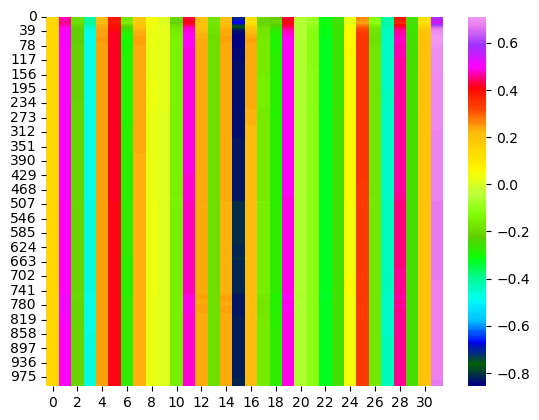

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
heatmap_plot = sns.heatmap(output,center=0,cmap='gist_ncar')
#plt.imshow(output,cmap=('gray'))

In [26]:

import torch
from torch import nn
 
# 假设我们有一些查询、键和值的嵌入
query = torch.rand(250, 1, 10)  # (batch_size, num_queries, embedding_dim)
key = value = query  # 在这个例子中，我们使用相同的query, key, value
 
# 实例化多头注意力层
attention = nn.MultiheadAttention(embed_dim=10, num_heads=5)
 
# 通过多头注意力层传递查询
attention_output, attention_weights = attention(query, key, value)
 
# 输出的形状应该为 (batch_size, num_queries, embedding_dim)
print(attention_output.shape)
# 注意力权重的形状应该为 (batch_size, num_heads, num_queries, num_queries)
print(attention_weights.shape)

torch.Size([250, 1, 10])
torch.Size([1, 250, 250])
